## 2.1

Пусть задано две вектора ответов: y — истинный вектор ответов для некоторой выборки, а также есть вектор ответов $\hat{y}$ – некоторой предсказательной модели. Наблюдатель хочет проверить гипотезу о том, что ровно в 25$\%$ случаев модель дает заниженные оценки. Предложите метод проверки данной гипотезы: запишите задачу формально, предложите статистику для решения данной задачи на уровне значимости $\alpha = 0.05$. Также найти зависимость мощности данного критерия от истинного процента заниженных ответов.

-----

Будем применять двухвыборочный критерий знаков. Изменение лишь в том, что в гипотезах равенство/неравенство поменялось с 1/2 на 1/4

$y = X_{1}^{n}, \hat{y} = X_{2}^{n}$

$X_{1}^{n}=\left(X_{11}, \ldots, X_{1 n}\right)$

$X_{2}^{n}=\left(X_{21}, \ldots, X_{2 n}\right), X_{1 i} \neq X_{2 i}, \text{выборки связанные} $

$H_0: \mathbf{P}\left(X_{1}>X_{2}\right)=\frac{1}{4}$

$H_1: \mathbf{P}\left(X_{1}>X_{2}\right)\neq\frac{1}{4}$

Статистика: $T\left(X_{1}^{n}, X_{2}^{n}\right)=\sum_{i=1}^{n}\left[X_{1 i}>X_{2 i}\right]$

Нулевое распределение: $\operatorname{Bin}\left(n, \cfrac{1}{4}\right)$

In [7]:
from statsmodels.stats.proportion import binom_test
import numpy as np
from tqdm import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

mpl.style.use('seaborn')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['figure.figsize'] = (9.0, 9.0)

Исследуем мощность в зависимости от истинного процента заниженных ответов. Проведем тестирование для 100 вариантов истинного процента. Получим с помощью биномиального теста p-values. Нулевое распределение дискретно, поэтому мощность будем просто считать, как отклонили гипотезу или нет: если отклоняем $H_0$, то мощность в этом случае = 1, иначе 0 (не отклоняем)

In [23]:
p_values = []
sample_size = 100
powers = np.zeros(100)

for i, p in tqdm(enumerate(np.linspace(0, 1, 100))): # p -- истинный процент заниженных ответов
    pval = binom_test(int(p*sample_size), sample_size, prop=0.25, alternative='two-sided')
    p_values.append(pval)
    if pval <= 0.05:
        powers[i] = 1 # т.к. отклоняем гипотезу  H_0

100it [00:00, 704.66it/s]


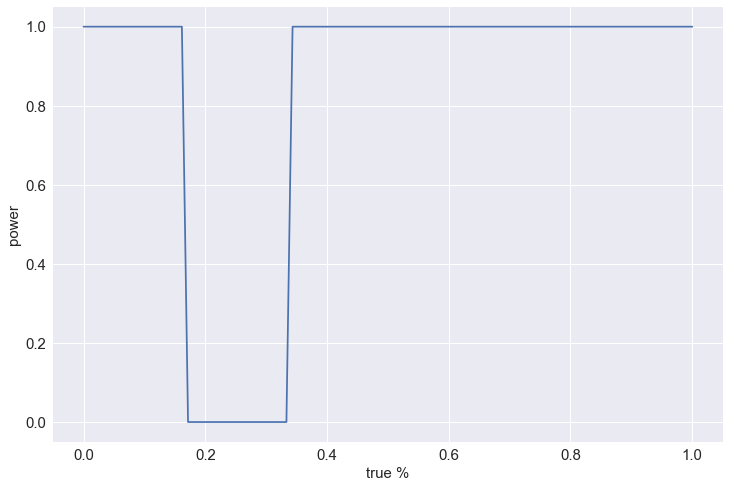

In [27]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0, 1, 100), powers)
plt.xlabel("true %")
plt.ylabel("power")
plt.show()

На самом деле здесь более информативен график зависимости pvalues от истинного процента заниженных ответов. Построим его

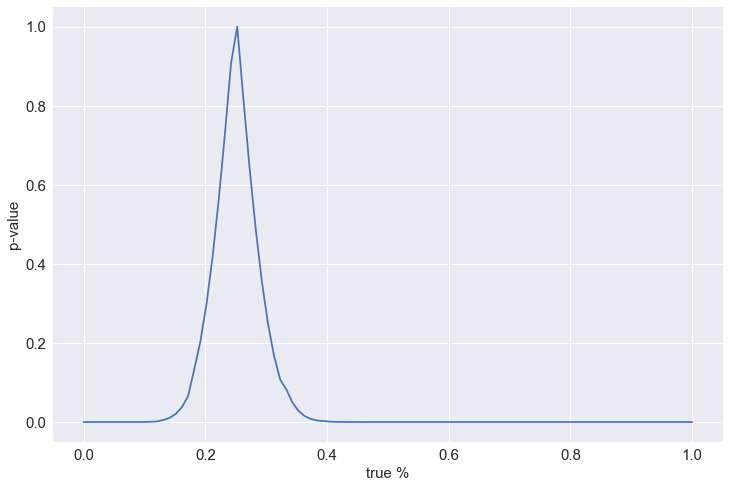

In [26]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0, 1, 100), p_values)
plt.xlabel("true %")
plt.ylabel("p-value")
plt.show()

### Вывод

Судя по графикам, при истинных процентах заниженных ответов, близких к 25, критерий не различает эти случаи от 25% – гипотеза не отклоняется. Но при значениях, отличающихся от 25% значительно ($\approx 0-18 \%, 33-100\%$), критерий уверенно отвергает гипотезу. Таким образом, критерий достаточно хорошо подходит для нашей задачи 